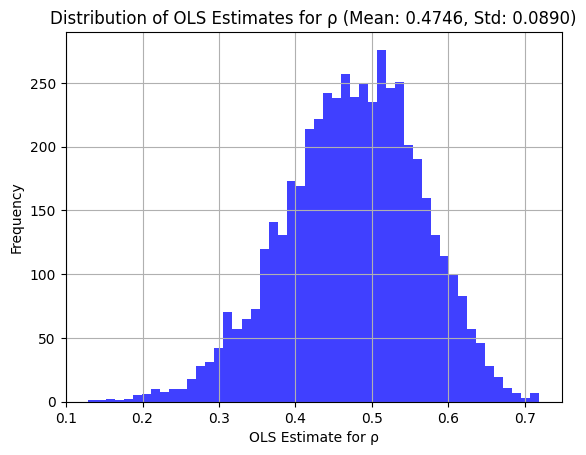

(np.float64(0.47458393552833006), np.float64(0.08895074248322132))

In [36]:
#####T=100, rho=0.5, num_sim=5000#####

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Parameters
T = 100        # Number of observations
rho = 0.5      # AR(1) parameter
num_sim = 5000 # Number of Monte Carlo simulations

# Function to generate AR(1) process
def generate_ar1(T, rho):
    y = np.zeros(T)
    epsilon = np.random.normal(0, 1, T)
    for t in range(1, T):
        y[t] = rho * y[t-1] + epsilon[t]
    return y

# Monte Carlo simulation
rho_estimates = []
for _ in range(num_sim):
    # Generate AR(1) sample
    y = generate_ar1(T, rho)
    
    # OLS estimate for rho
    X = sm.add_constant(y[:-1]) # Add constant term for OLS regression
    model = sm.OLS(y[1:], X).fit()
    rho_hat = model.params[1] # Coefficient estimate for rho
    rho_estimates.append(rho_hat)

# Convert results to numpy array for analysis
rho_estimates = np.array(rho_estimates)

# Display mean and standard deviation of the distribution of rho estimates
mean_rho = np.mean(rho_estimates)
std_rho = np.std(rho_estimates)

# Plot the distribution of OLS estimates for rho
plt.hist(rho_estimates, bins=50, alpha=0.75, color='blue')
plt.title(f'Distribution of OLS Estimates for ρ (Mean: {mean_rho:.4f}, Std: {std_rho:.4f})')
plt.xlabel('OLS Estimate for ρ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print the mean and standard deviation
mean_rho, std_rho

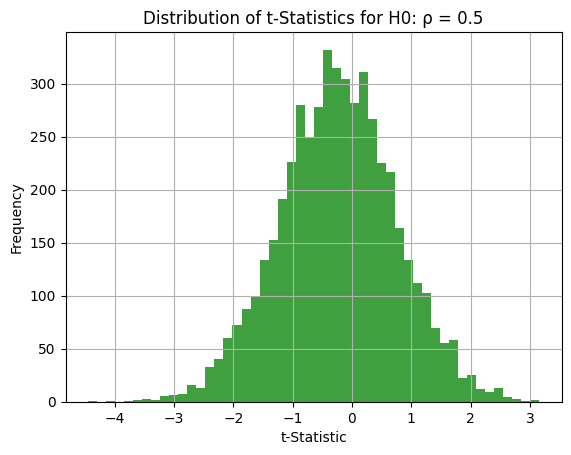

(np.float64(-0.24307891079749816), np.float64(0.9845785106479572))

In [37]:
##### T=100, rho=0.5, num_sim=5000 #####

# Parameters
T = 100        # Number of observations
rho_true = 0.5 # True AR(1) parameter
num_sim = 5000 # Number of Monte Carlo simulations

# Function to generate AR(1) process
def generate_ar1(T, rho):
    y = np.zeros(T)
    epsilon = np.random.normal(0, 1, T)
    for t in range(1, T):
        y[t] = rho * y[t-1] + epsilon[t]
    return y

# Monte Carlo simulation for t-statistics
t_stats = []
for _ in range(num_sim):
    # Generate AR(1) sample
    y = generate_ar1(T, rho_true)
    
    # OLS estimate for rho
    X = sm.add_constant(y[:-1]) # Add constant term for OLS regression
    model = sm.OLS(y[1:], X).fit()
    rho_hat = model.params[1] # Coefficient estimate for rho
    
    # Compute the standard error of rho_hat
    se_rho_hat = model.bse[1]
    
    # Compute the t-statistic for testing H0: rho = 0.5
    t_stat = (rho_hat - rho_true) / se_rho_hat
    t_stats.append(t_stat)

# Convert results to numpy array for analysis
t_stats = np.array(t_stats)

# Plot the distribution of t-statistics
plt.hist(t_stats, bins=50, alpha=0.75, color='green')
plt.title(f'Distribution of t-Statistics for H0: ρ = 0.5')
plt.xlabel('t-Statistic')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Display mean and standard deviation of the t-statistics
mean_t = np.mean(t_stats)
std_t = np.std(t_stats)
mean_t, std_t


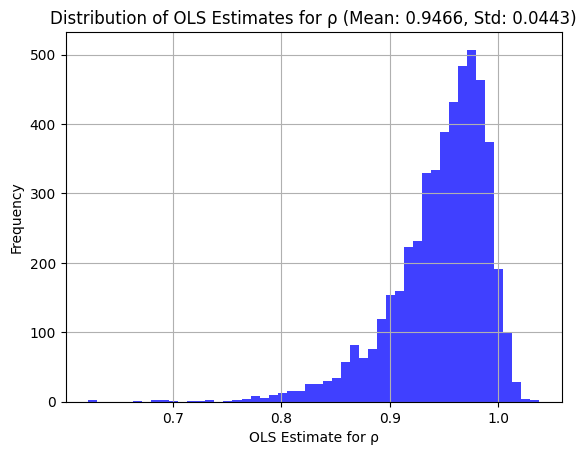

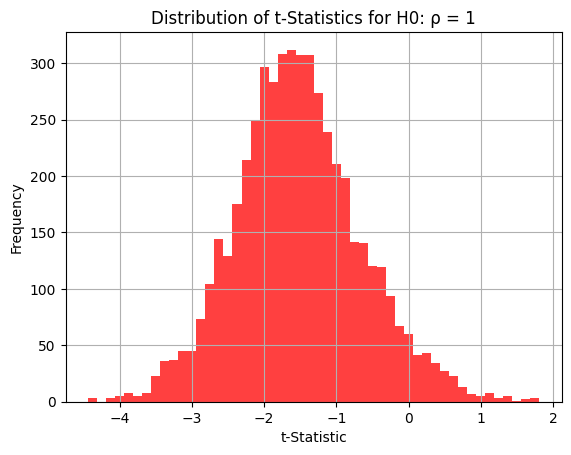

(np.float64(-1.5256962236143006), np.float64(0.8661878438682911))

In [38]:
####### T=100, rho=1.0, num_sim=5000 #######


# Parameters
T = 100        # Number of observations
rho_true2 = 1.0 # True AR(1) parameter for this case
num_sim = 5000 # Number of Monte Carlo simulations

# Function to generate AR(1) process
def generate_ar1(T, rho):
    y = np.zeros(T)
    epsilon = np.random.normal(0, 1, T)
    for t in range(1, T):
        y[t] = rho * y[t-1] + epsilon[t]
    return y


# Monte Carlo simulation
rho_estimates = []
for _ in range(num_sim):
    # Generate AR(1) sample
    y = generate_ar1(T, rho_true2)
    
    # OLS estimate for rho
    X = sm.add_constant(y[:-1]) # Add constant term for OLS regression
    model = sm.OLS(y[1:], X).fit()
    rho_hat = model.params[1] # Coefficient estimate for rho
    rho_estimates.append(rho_hat)

# Convert results to numpy array for analysis
rho_estimates = np.array(rho_estimates)

# Display mean and standard deviation of the distribution of rho estimates
mean_rho = np.mean(rho_estimates)
std_rho = np.std(rho_estimates)

# Plot the distribution of OLS estimates for rho
plt.hist(rho_estimates, bins=50, alpha=0.75, color='blue')
plt.title(f'Distribution of OLS Estimates for ρ (Mean: {mean_rho:.4f}, Std: {std_rho:.4f})')
plt.xlabel('OLS Estimate for ρ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Monte Carlo simulation for t-statistics
t_stats = []
for _ in range(num_sim):
    # Generate AR(1) sample with ρ = 1
    y = generate_ar1(T, rho_true2)
    
    # OLS estimate for rho
    X = sm.add_constant(y[:-1]) # Add constant term for OLS regression
    model = sm.OLS(y[1:], X).fit()
    rho_hat = model.params[1] # Coefficient estimate for rho
    
    # Compute the standard error of rho_hat
    se_rho_hat = model.bse[1]
    
    # Compute the t-statistic for testing H0: rho = 1
    t_stat = (rho_hat - rho_true2) / se_rho_hat
    t_stats.append(t_stat)

# Convert results to numpy array for analysis
t_stats = np.array(t_stats)

# Plot the distribution of t-statistics
plt.hist(t_stats, bins=50, alpha=0.75, color='red')
plt.title(f'Distribution of t-Statistics for H0: ρ = 1')
plt.xlabel('t-Statistic')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Display mean and standard deviation of the t-statistics
mean_t = np.mean(t_stats)
std_t = np.std(t_stats)
mean_t, std_t

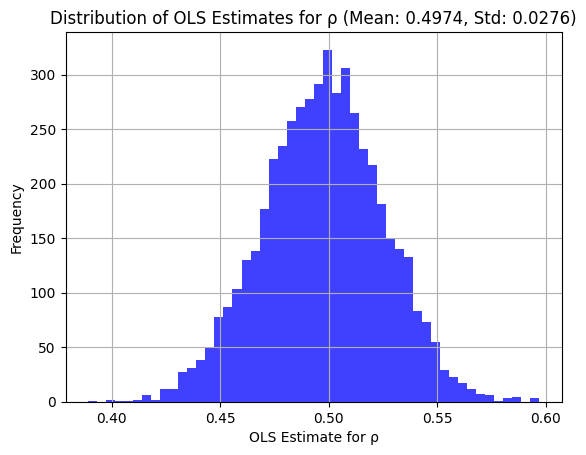

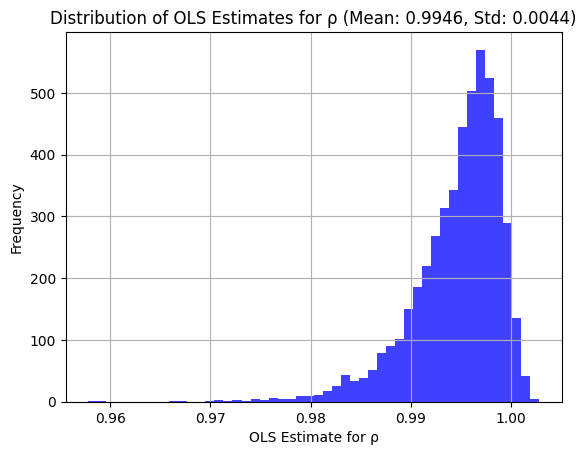

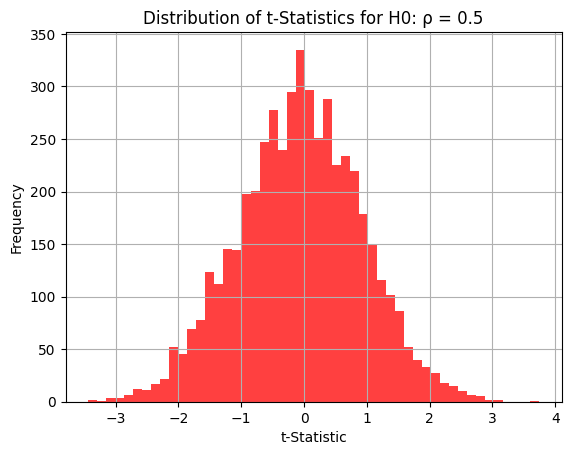

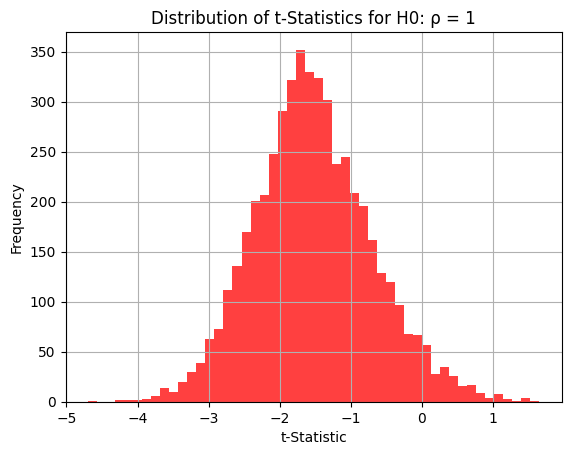

In [39]:
###### T=1000, rho=0.5, rho=1, num_sim=5000 ######


# Parameters
T = 1000 
rho2=0.5       # Number of observations
rho_true2 = 1.0 # True AR(1) parameter for this case
num_sim = 5000 # Number of Monte Carlo simulations

# Function to generate AR(1) process
def generate_ar1(T, rho):
    y = np.zeros(T)
    epsilon = np.random.normal(0, 1, T)
    for t in range(1, T):
        y[t] = rho * y[t-1] + epsilon[t]
    return y

# Monte Carlo simulation for rho=0.5
rho_estimates1 = []
for _ in range(num_sim):
    # Generate AR(1) sample
    y = generate_ar1(T, rho2)
    
    # OLS estimate for rho
    X = sm.add_constant(y[:-1]) # Add constant term for OLS regression
    model = sm.OLS(y[1:], X).fit()
    rho_hat1 = model.params[1] # Coefficient estimate for rho
    rho_estimates1.append(rho_hat1)
# Convert results to numpy array for analysis
rho_estimates1 = np.array(rho_estimates1)

# Monte Carlo simulation for rho=1
rho_estimates2 = []
for _ in range(num_sim):
    # Generate AR(1) sample
    y = generate_ar1(T, rho_true2)
    
    # OLS estimate for rho
    X = sm.add_constant(y[:-1]) # Add constant term for OLS regression
    model = sm.OLS(y[1:], X).fit()
    rho_hat2 = model.params[1] # Coefficient estimate for rho
    rho_estimates2.append(rho_hat2)

# Convert results to numpy array for analysis
rho_estimates2 = np.array(rho_estimates2)

# Display mean and standard deviation of the distribution of rho estimates
mean_rho1 = np.mean(rho_estimates1)
std_rho1 = np.std(rho_estimates1)

mean_rho2 = np.mean(rho_estimates2)
std_rho2 = np.std(rho_estimates2)


# Plot the distribution of OLS estimates for rho=0.5
plt.hist(rho_estimates1, bins=50, alpha=0.75, color='blue')
plt.title(f'Distribution of OLS Estimates for ρ (Mean: {mean_rho1:.4f}, Std: {std_rho1:.4f})')
plt.xlabel('OLS Estimate for ρ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot the distribution of OLS estimates for rho=1
plt.hist(rho_estimates2, bins=50, alpha=0.75, color='blue')
plt.title(f'Distribution of OLS Estimates for ρ (Mean: {mean_rho2:.4f}, Std: {std_rho2:.4f})')
plt.xlabel('OLS Estimate for ρ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Monte Carlo simulation for t-statistics for rho=0.5
t_stats1 = []
for _ in range(num_sim):
    # Generate AR(1) sample with ρ = 0.5
    y = generate_ar1(T, rho2)
    
    # OLS estimate for rho
    X = sm.add_constant(y[:-1]) # Add constant term for OLS regression
    model1 = sm.OLS(y[1:], X).fit()
    rho_hat1 = model1.params[1] # Coefficient estimate for rho
    
    # Compute the standard error of rho_hat
    se_rho_hat1 = model1.bse[1]
    
    # Compute the t-statistic for testing H0: rho = 0.5
    t_stat1 = (rho_hat1 - rho2) / se_rho_hat1
    t_stats1.append(t_stat1)

# Convert results to numpy array for analysis
t_stats1 = np.array(t_stats1)

# Monte Carlo simulation for t-statistics for rho=1
t_stats2 = []
for _ in range(num_sim):
    # Generate AR(1) sample with ρ = 1
    y2 = generate_ar1(T, rho_true2)
    
    # OLS estimate for rho
    X2 = sm.add_constant(y2[:-1]) # Add constant term for OLS regression
    model2 = sm.OLS(y2[1:], X2).fit()
    rho_hat2 = model2.params[1] # Coefficient estimate for rho
    
    # Compute the standard error of rho_hat
    se_rho_hat2 = model2.bse[1]
    
    # Compute the t-statistic for testing H0: rho = 1
    t_stat2 = (rho_hat2 - rho_true2) / se_rho_hat2
    t_stats2.append(t_stat2)

# Convert results to numpy array for analysis
t_stats2 = np.array(t_stats2)

# Plot the distribution of t-statistics for rho=0.5
plt.hist(t_stats1, bins=50, alpha=0.75, color='red')
plt.title(f'Distribution of t-Statistics for H0: ρ = 0.5')
plt.xlabel('t-Statistic')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot the distribution of t-statistics for rho=1
plt.hist(t_stats2, bins=50, alpha=0.75, color='red')
plt.title(f'Distribution of t-Statistics for H0: ρ = 1')
plt.xlabel('t-Statistic')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




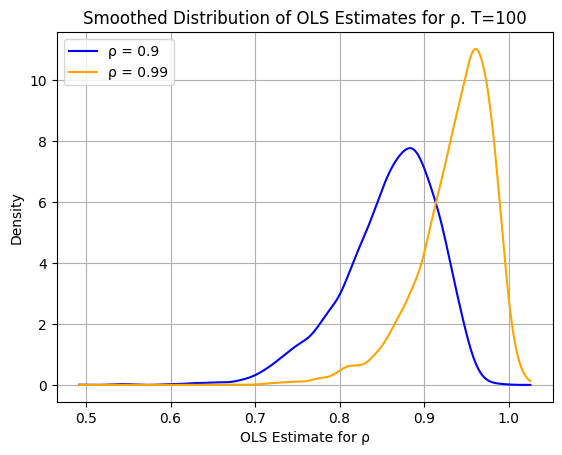

In [45]:
#########T=100, rho=0.9, and rho=0.99 num_sim=5000#########


# Parameters
T = 100        # Number of observations
rho3 = 0.9     # AR(1) parameter
num_sim = 5000 # Number of Monte Carlo simulations

# Function to generate AR(1) process
def generate_ar1(T, rho):
    y = np.zeros(T)
    epsilon = np.random.normal(0, 1, T)
    for t in range(1, T):
        y[t] = rho * y[t-1] + epsilon[t]
    return y

# Monte Carlo simulation
rho_estimates3 = []
for _ in range(num_sim):
    # Generate AR(1) sample
    y = generate_ar1(T, rho3)
    
    # OLS estimate for rho
    X = sm.add_constant(y[:-1]) # Add constant term for OLS regression
    model3 = sm.OLS(y[1:], X).fit()
    rho_hat3 = model3.params[1] # Coefficient estimate for rho
    rho_estimates3.append(rho_hat3)

# Convert results to numpy array for analysis
rho_estimates3 = np.array(rho_estimates3)

# Display mean and standard deviation of the distribution of rho estimates
mean_rho3 = np.mean(rho_estimates3)
std_rho3 = np.std(rho_estimates3)


# Parameters for rho=0.99
rho4 = 0.99

# Monte Carlo simulation for rho=0.99
rho_estimates4 = []
for _ in range(num_sim):
    # Generate AR(1) sample
    y = generate_ar1(T, rho4)
    
    # OLS estimate for rho
    X = sm.add_constant(y[:-1]) # Add constant term for OLS regression
    model4 = sm.OLS(y[1:], X).fit()
    rho_hat4 = model4.params[1] # Coefficient estimate for rho
    rho_estimates4.append(rho_hat4)

# Convert results to numpy array for analysis
rho_estimates4 = np.array(rho_estimates4)

# Display mean and standard deviation of the distribution of rho estimates
mean_rho4 = np.mean(rho_estimates4)
std_rho4 = np.std(rho_estimates4)



# Plot the smoothed distribution of OLS estimates for rho=0.9 and rho=0.99 on the same graph

# Calculate the density estimates
density_rho3 = gaussian_kde(rho_estimates3)
density_rho4 = gaussian_kde(rho_estimates4)

# Generate a range of values for plotting
x_vals = np.linspace(min(rho_estimates3.min(), rho_estimates4.min()), max(rho_estimates3.max(), rho_estimates4.max()), 1000)

# Plot the density estimates
plt.plot(x_vals, density_rho3(x_vals), label='ρ = 0.9', color='blue')
plt.plot(x_vals, density_rho4(x_vals), label='ρ = 0.99', color='orange')
plt.title('Smoothed Distribution of OLS Estimates for ρ. T=100')
plt.xlabel('OLS Estimate for ρ')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

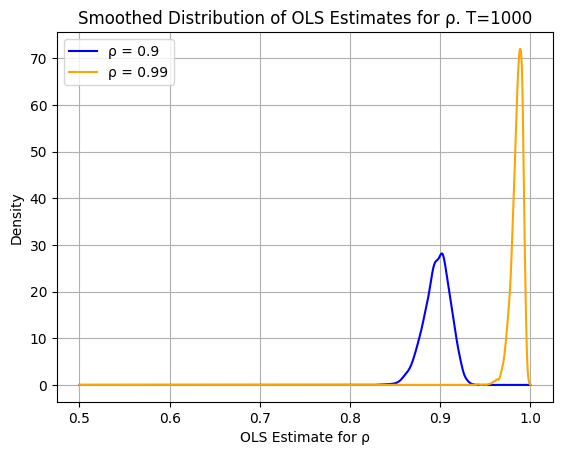

In [44]:
#########T=1000, rho=0.9, and rho=0.99 num_sim=5000#########


# Parameters
T = 1000        # Number of observations
rho3 = 0.9     # AR(1) parameter
num_sim = 5000 # Number of Monte Carlo simulations

# Function to generate AR(1) process
def generate_ar1(T, rho):
    y = np.zeros(T)
    epsilon = np.random.normal(0, 1, T)
    for t in range(1, T):
        y[t] = rho * y[t-1] + epsilon[t]
    return y

# Monte Carlo simulation
rho_estimates3 = []
for _ in range(num_sim):
    # Generate AR(1) sample
    y = generate_ar1(T, rho3)
    
    # OLS estimate for rho
    X = sm.add_constant(y[:-1]) # Add constant term for OLS regression
    model3 = sm.OLS(y[1:], X).fit()
    rho_hat3 = model3.params[1] # Coefficient estimate for rho
    rho_estimates3.append(rho_hat3)

# Convert results to numpy array for analysis
rho_estimates3 = np.array(rho_estimates3)

# Display mean and standard deviation of the distribution of rho estimates
mean_rho3 = np.mean(rho_estimates3)
std_rho3 = np.std(rho_estimates3)


# Parameters for rho=0.99
rho4 = 0.99

# Monte Carlo simulation for rho=0.99
rho_estimates4 = []
for _ in range(num_sim):
    # Generate AR(1) sample
    y = generate_ar1(T, rho4)
    
    # OLS estimate for rho
    X = sm.add_constant(y[:-1]) # Add constant term for OLS regression
    model4 = sm.OLS(y[1:], X).fit()
    rho_hat4 = model4.params[1] # Coefficient estimate for rho
    rho_estimates4.append(rho_hat4)

# Convert results to numpy array for analysis
rho_estimates4 = np.array(rho_estimates4)

# Display mean and standard deviation of the distribution of rho estimates
mean_rho4 = np.mean(rho_estimates4)
std_rho4 = np.std(rho_estimates4)



# Plot the smoothed distribution of OLS estimates for rho=0.9 and rho=0.99 on the same graph

# Calculate the density estimates
density_rho3 = gaussian_kde(rho_estimates3)
density_rho4 = gaussian_kde(rho_estimates4)

# Generate a range of values for plotting
x_vals = np.linspace(min(rho_estimates3.min(), rho_estimates4.min()), max(rho_estimates3.max(), rho_estimates4.max()), 1000)

# Generate a range of values for plotting from 0.5 to 1
x_vals = np.linspace(0.5, 1, 1000)

# Plot the density estimates
plt.plot(x_vals, density_rho3(x_vals), label='ρ = 0.9', color='blue')
plt.plot(x_vals, density_rho4(x_vals), label='ρ = 0.99', color='orange')
plt.title('Smoothed Distribution of OLS Estimates for ρ. T=1000')
plt.xlabel('OLS Estimate for ρ')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


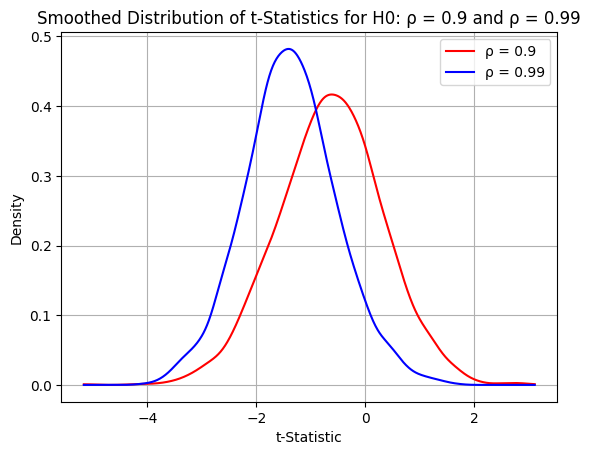

In [52]:
###### T stats for rho=0.9 and rho=0.99 T=100######

# Monte Carlo simulation for t-statistics
t_stats5 = []
for _ in range(num_sim):
    # Generate AR(1) sample with ρ = 0.9
    y = generate_ar1(T, rho3)
    
    # OLS estimate for rho
    X = sm.add_constant(y[:-1]) # Add constant term for OLS regression
    model5 = sm.OLS(y[1:], X).fit()
    rho_hat5 = model5.params[1] # Coefficient estimate for rho
    
    # Compute the standard error of rho_hat
    se_rho_hat5 = model5.bse[1]
    
    # Compute the t-statistic for testing H0: rho = 1
    t_stat5 = (rho_hat5 - rho3) / se_rho_hat5
    t_stats5.append(t_stat5)

# Convert results to numpy array for analysis
t_stats5 = np.array(t_stats5)


# Monte Carlo simulation for t-statistics for rho=0.99
t_stats6 = []
for _ in range(num_sim):
    # Generate AR(1) sample with ρ = 0.99
    y = generate_ar1(T, rho4)
    
    # OLS estimate for rho
    X = sm.add_constant(y[:-1]) # Add constant term for OLS regression
    model6 = sm.OLS(y[1:], X).fit()
    rho_hat6 = model6.params[1] # Coefficient estimate for rho
    
    # Compute the standard error of rho_hat
    se_rho_hat6 = model6.bse[1]
    
    # Compute the t-statistic for testing H0: rho = 0.99
    t_stat6 = (rho_hat6 - rho4) / se_rho_hat6
    t_stats6.append(t_stat6)

# Convert results to numpy array for analysis
t_stats6 = np.array(t_stats6)

# Calculate the density estimates
density_t_stats5 = gaussian_kde(t_stats5)
density_t_stats6 = gaussian_kde(t_stats6)

# Generate a range of values for plotting
x_vals = np.linspace(min(t_stats5.min(), t_stats6.min()), max(t_stats5.max(), t_stats6.max()), 1000)

# Plot the density estimates
plt.plot(x_vals, density_t_stats5(x_vals), label='ρ = 0.9', color='red')
plt.plot(x_vals, density_t_stats6(x_vals), label='ρ = 0.99', color='blue')
plt.title('Smoothed Distribution of t-Statistics for H0: ρ = 0.9 and ρ = 0.99')
plt.xlabel('t-Statistic')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

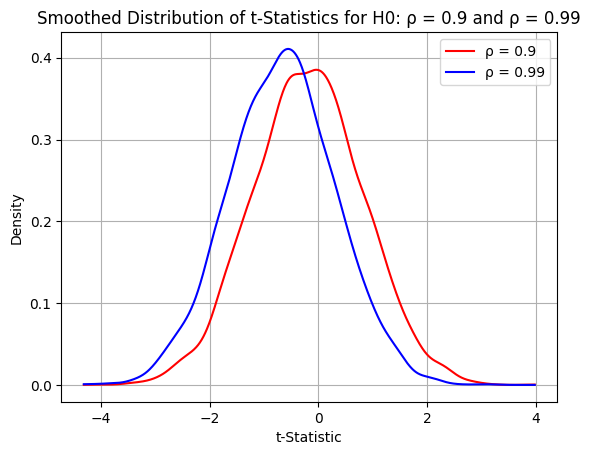

In [53]:
###### T stats for rho=0.9 and rho=0.99 T=1000 ######

# Monte Carlo simulation for t-statistics
t_stats5 = []
for _ in range(num_sim):
    # Generate AR(1) sample with ρ = 0.9
    y = generate_ar1(T*10, rho3)
    
    # OLS estimate for rho
    X = sm.add_constant(y[:-1]) # Add constant term for OLS regression
    model5 = sm.OLS(y[1:], X).fit()
    rho_hat5 = model5.params[1] # Coefficient estimate for rho
    
    # Compute the standard error of rho_hat
    se_rho_hat5 = model5.bse[1]
    
    # Compute the t-statistic for testing H0: rho = 1
    t_stat5 = (rho_hat5 - rho3) / se_rho_hat5
    t_stats5.append(t_stat5)

# Convert results to numpy array for analysis
t_stats5 = np.array(t_stats5)


# Monte Carlo simulation for t-statistics for rho=0.99
t_stats6 = []
for _ in range(num_sim):
    # Generate AR(1) sample with ρ = 0.99
    y = generate_ar1(T*10, rho4)
    
    # OLS estimate for rho
    X = sm.add_constant(y[:-1]) # Add constant term for OLS regression
    model6 = sm.OLS(y[1:], X).fit()
    rho_hat6 = model6.params[1] # Coefficient estimate for rho
    
    # Compute the standard error of rho_hat
    se_rho_hat6 = model6.bse[1]
    
    # Compute the t-statistic for testing H0: rho = 0.99
    t_stat6 = (rho_hat6 - rho4) / se_rho_hat6
    t_stats6.append(t_stat6)

# Convert results to numpy array for analysis
t_stats6 = np.array(t_stats6)

# Calculate the density estimates
density_t_stats5 = gaussian_kde(t_stats5)
density_t_stats6 = gaussian_kde(t_stats6)

# Generate a range of values for plotting
x_vals = np.linspace(min(t_stats5.min(), t_stats6.min()), max(t_stats5.max(), t_stats6.max()), 1000)

# Plot the density estimates
plt.plot(x_vals, density_t_stats5(x_vals), label='ρ = 0.9', color='red')
plt.plot(x_vals, density_t_stats6(x_vals), label='ρ = 0.99', color='blue')
plt.title('Smoothed Distribution of t-Statistics for H0: ρ = 0.9 and ρ = 0.99')
plt.xlabel('t-Statistic')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()